# 프로젝트: 퍼스널 컬러 진단하기 - 피부 영역 검출하기

## 데이터  
연예인 사진  

## 목표  
1. OpenCV CVTcolor와 bitwise_and 함수를 활용한 Face Detection  
1) 이미지 데이터의 기본 색상공간 RGB을 YCbCr 또는 HSV로 변환  
2) OpenCV의 CVTColor 함수 활용  
3) YCbCr Mask 생성  
4) 생성한 Mask를 원본 이미지에 입힘  
5) Face Detection된 얼굴 피부 영역의 숫자 픽셀값 도출  

2. Semantic Segmentation을 통한 얼굴 피부 영역 검출  
1) 대표적인 Model: DeepLab v3+, R-CNN, U-NET, FCN  

## (1) 라이브러리 및 데이터 불러오기

In [1]:
import numpy as np
import os
%matplotlib inline
import matplotlib.pyplot as plt
import cv2

In [2]:
np.set_printoptions(threshold=np.inf, linewidth=np.inf) #inf = infinity

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
celebrity_picture_path = "/content/drive/MyDrive/four_seasons/사계절_연예인 이미지 데이터셋/train data/0703 updated/연예인"

def count_files_in_directory(directory):
    count = 0
    for _, _, files in os.walk(directory):
        count += len(files)
    return count

file_count = count_files_in_directory(celebrity_picture_path)
print("파일 개수:", file_count)
# 파일 개수 290개

파일 개수: 290


## (2) face detection

In [5]:
#Open a simple image
img=cv2.imread(celebrity_picture_path + "/공유.jpg")

#converting from gbr to hsv color space
img_HSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
#skin color range for hsv color space
HSV_mask = cv2.inRange(img_HSV, (0, 15, 0), (17,170,255))
HSV_mask = cv2.morphologyEx(HSV_mask, cv2.MORPH_OPEN, np.ones((3,3), np.uint8))

#converting from gbr to YCbCr color space
img_YCrCb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
#skin color range for hsv color space
YCrCb_mask = cv2.inRange(img_YCrCb, (0, 135, 85), (255,180,135))
YCrCb_mask = cv2.morphologyEx(YCrCb_mask, cv2.MORPH_OPEN, np.ones((3,3), np.uint8))

#merge skin detection (YCbCr and hsv)
global_mask=cv2.bitwise_and(YCrCb_mask,HSV_mask)
global_mask=cv2.medianBlur(global_mask,3)
global_mask = cv2.morphologyEx(global_mask, cv2.MORPH_OPEN, np.ones((4,4), np.uint8))


HSV_result = cv2.bitwise_not(HSV_mask)
YCrCb_result = cv2.bitwise_not(YCrCb_mask)
global_result=cv2.bitwise_not(global_mask)


#show results
# cv2.imshow("1_HSV.jpg",HSV_result)
# cv2.imshow("2_YCbCr.jpg",YCrCb_result)
# cv2.imshow("3_global_result.jpg",global_result)
# cv2.imshow("Image.jpg",img)
cv2.imwrite("1_HSV.jpg",HSV_result)
cv2.imwrite("2_YCbCr.jpg",YCrCb_result)
cv2.imwrite("3_global_result.jpg",global_result)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
path = "/content"

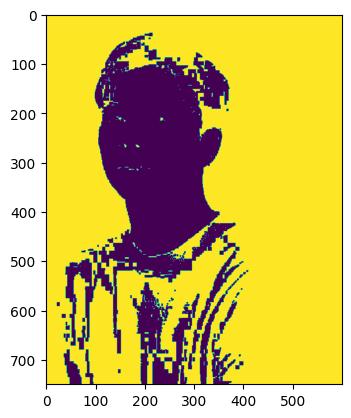

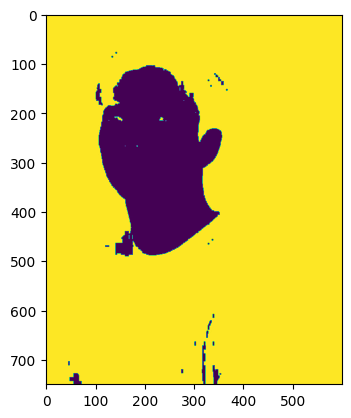

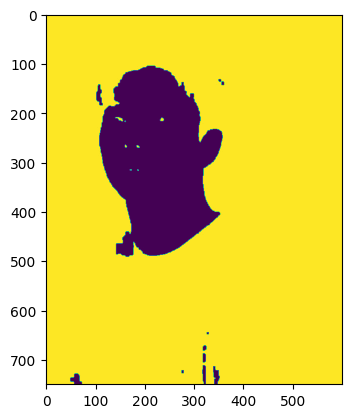

In [7]:
import PIL
from PIL import Image
import matplotlib.pyplot as plt

HSV_path = path + "/1_HSV.jpg"
image1 = Image.open(HSV_path)
YCbCr_path = path + "/2_YCbCr.jpg"
image2 = Image.open(YCbCr_path)
result_path = path + "/3_global_result.jpg"
image3 = Image.open(result_path)

plt.imshow(image1)
plt.show()
plt.imshow(image2)
plt.show()
plt.imshow(image3)
plt.show()

### a. HSV

In [8]:
#img_HSV

In [9]:
#HSV_mask

In [12]:
#img_YCbCr

In [13]:
#YCbCr_mask

In [14]:
# 함수로 만들 예정
# 255인 요소들의 좌표를 추출
HSV_black = np.argwhere(HSV_mask == 255)

pixel_values = []

# 좌표 출력
for index in HSV_black:
    y, x = index
    #print(f"x: {x}, y: {y}") #일반적으로 생각하는 가로 x, 세로 y로 표현하기 위해 위치 바꿈
    pixel_value = img_HSV[y, x]
    pixel_values.append(pixel_value)

# 결과 출력
for coord, pixel_value in zip(HSV_black, pixel_values):
    x, y = coord
    #print(f"Coordinate: ({x}, {y}), Pixel Value: {pixel_value}")

In [15]:
# 함수로 만들 예정
# 열 별로 원소들을 더하기
column_sums = np.sum(pixel_values, axis=0)

# pixel_values를 NumPy 배열로 변환
pixel_values = np.array(pixel_values)

# 열 별로 평균 계산하기
column_means = column_sums / pixel_values.shape[0]

# 결과 출력
print(column_means)

[ 11.46915439  61.39848098 165.82803593]


In [16]:
#HSV 좌표랑 픽셀뽑기
# 255인 요소들의 좌표를 추출
HSV_black = np.argwhere(HSV_mask == 255)

pixel_values = []

# 좌표 출력
for index in HSV_black:
    y, x = index
    #print(f"x: {x}, y: {y}") #일반적으로 생각하는 가로 x, 세로 y로 표현하기 위해 위치 바꿈
    pixel_value = img_HSV[y, x]
    pixel_values.append(pixel_value)

# 결과 출력
for coord, pixel_value in zip(HSV_black, pixel_values):
    x, y = coord
    #print(f"Coordinate: ({x}, {y}), Pixel Value: {pixel_value}")

In [17]:
# HSV 픽셀 평균값 뽑기
# 열 별로 원소들을 더하기
column_sums = np.sum(pixel_values, axis=0)

# pixel_values를 NumPy 배열로 변환
pixel_values = np.array(pixel_values)

# 열 별로 평균 계산하기
column_means = column_sums / pixel_values.shape[0]

# 결과 출력
print(column_means)

[ 11.46915439  61.39848098 165.82803593]


In [20]:
# YCbCr 좌표랑 픽셀뽑기
# 255인 요소들의 좌표를 추출
YCrCb_black = np.argwhere(YCrCb_mask == 255)

pixel_values = []

# 좌표 출력
for index in YCrCb_black:
    y, x = index
    #print(f"x: {x}, y: {y}") #일반적으로 생각하는 가로 x, 세로 y로 표현하기 위해 위치 바꿈
    pixel_value = img_YCrCb[y, x]
    pixel_values.append(pixel_value)

# 결과 출력
for coord, pixel_value in zip(YCrCb_black, pixel_values):
    x, y = coord
    #print(f"Coordinate: ({x}, {y}), Pixel Value: {pixel_value}")

In [21]:
# YCbCr 픽셀 평균값 뽑기
# 열 별로 원소들을 더하기
column_sums = np.sum(pixel_values, axis=0)

# pixel_values를 NumPy 배열로 변환
pixel_values = np.array(pixel_values)

# 열 별로 평균 계산하기
column_means = column_sums / pixel_values.shape[0]

# 결과 출력
print(column_means)

[152.30451744 148.11892834 112.27967667]
